In [21]:
import pandas as pd
import geopy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv("Data/NYPD_Complaint_Data_Current__Year_To_Date.csv")

In [24]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,758521794,67,NaN,03/07/2021,01:50:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,18-24,BLACK,M,1008789,177637,40.654223,-73.911563,"(40.654223423000076, -73.91156340899995)",POINT (-73.91156340899995 40.654223423000076)
1,696896951,60,NaN,03/26/2021,18:40:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK HISPANIC,M,987641,148923,40.575443,-73.987795,"(40.57544276900006, -73.98779476299995)",POINT (-73.98779476299995 40.57544276900006)
2,972479923,75,BROOKLYN,03/27/2021,15:55:00,03/27/2021,16:00:00,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,1020990,186549,40.678643,-73.867543,"(40.67864264400004, -73.867542755)",POINT (-73.867542755 40.67864264400004)
3,109344500,77,BROOKLYN,03/28/2021,11:10:00,03/28/2021,11:23:00,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,D,1004507,182865,40.668584,-73.926980,"(40.66858395700007, -73.92697993199994)",POINT (-73.92697993199994 40.66858395700007)
4,673945415,23,NaN,03/29/2021,23:13:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,WHITE HISPANIC,M,1000267,228200,40.793026,-73.942156,"(40.793026087000044, -73.94215617799993)",POINT (-73.94215617799993 40.793026087000044)


In [7]:
print(df.shape)

(204646, 36)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204646 entries, 0 to 204645
Data columns (total 36 columns):
CMPLNT_NUM                  204646 non-null int64
ADDR_PCT_CD                 204646 non-null int64
BORO_NM                     204261 non-null object
CMPLNT_FR_DT                204646 non-null object
CMPLNT_FR_TM                204646 non-null object
CMPLNT_TO_DT                186101 non-null object
CMPLNT_TO_TM                186165 non-null object
CRM_ATPT_CPTD_CD            204483 non-null object
HADEVELOPT                  802 non-null object
HOUSING_PSA                 15976 non-null float64
JURISDICTION_CODE           204437 non-null float64
JURIS_DESC                  204646 non-null object
KY_CD                       204646 non-null int64
LAW_CAT_CD                  204646 non-null object
LOC_OF_OCCUR_DESC           171200 non-null object
OFNS_DESC                   204639 non-null object
PARKS_NM                    1255 non-null object
PATROL_BORO                 2

In [9]:
df.isnull().sum()

CMPLNT_NUM                       0
ADDR_PCT_CD                      0
BORO_NM                        385
CMPLNT_FR_DT                     0
CMPLNT_FR_TM                     0
CMPLNT_TO_DT                 18545
CMPLNT_TO_TM                 18481
CRM_ATPT_CPTD_CD               163
HADEVELOPT                  203844
HOUSING_PSA                 188670
JURISDICTION_CODE              209
JURIS_DESC                       0
KY_CD                            0
LAW_CAT_CD                       0
LOC_OF_OCCUR_DESC            33446
OFNS_DESC                        7
PARKS_NM                    203391
PATROL_BORO                    209
PD_CD                          209
PD_DESC                        209
PREM_TYP_DESC                  540
RPT_DT                           0
STATION_NAME                200602
SUSP_AGE_GROUP               41085
SUSP_RACE                    41085
SUSP_SEX                     41085
TRANSIT_DISTRICT            200602
VIC_AGE_GROUP                    0
VIC_RACE            

In [10]:
df.duplicated().sum()

0

In [25]:
df["STATION_NAME"].fillna("No transit station name", inplace = True)
df["HOUSING_PSA"].fillna("No level development code", inplace = True)
df["PARKS_NM"].fillna("Not aplicable", inplace = True)
df["TRANSIT_DISTRICT"].fillna("No data available", inplace = True)
df["HADEVELOPT"].fillna("Not aplicable", inplace = True)


In [26]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['cmplnt_num', 'addr_pct_cd', 'boro_nm', 'cmplnt_fr_dt', 'cmplnt_fr_tm',
       'cmplnt_to_dt', 'cmplnt_to_tm', 'crm_atpt_cptd_cd', 'hadevelopt',
       'housing_psa', 'jurisdiction_code', 'juris_desc', 'ky_cd', 'law_cat_cd',
       'loc_of_occur_desc', 'ofns_desc', 'parks_nm', 'patrol_boro', 'pd_cd',
       'pd_desc', 'prem_typ_desc', 'rpt_dt', 'station_name', 'susp_age_group',
       'susp_race', 'susp_sex', 'transit_district', 'vic_age_group',
       'vic_race', 'vic_sex', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'lat_lon', 'new_georeferenced_column'],
      dtype='object')

In [13]:
df.head()

,cmplnt_num,addr_pct_cd,boro_nm,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,crm_atpt_cptd_cd,hadevelopt,housing_psa,...,transit_district,vic_age_group,vic_race,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon,new_georeferenced_column
0,758521794,67,NaN,03/07/2021,01:50:00,NaN,NaN,COMPLETED,Not aplicable,No level development code,...,No data available,18-24,BLACK,M,1008789,177637,40.654223,-73.911563,"(40.654223423000076, -73.91156340899995)",POINT (-73.91156340899995 40.654223423000076)
1,696896951,60,NaN,03/26/2021,18:40:00,NaN,NaN,COMPLETED,Not aplicable,No level development code,...,No data available,25-44,BLACK HISPANIC,M,987641,148923,40.575443,-73.987795,"(40.57544276900006, -73.98779476299995)",POINT (-73.98779476299995 40.57544276900006)
2,972479923,75,BROOKLYN,03/27/2021,15:55:00,03/27/2021,16:00:00,COMPLETED,Not aplicable,No level development code,...,No data available,25-44,BLACK,F,1020990,186549,40.678643,-73.867543,"(40.67864264400004, -73.867542755)",POINT (-73.867542755 40.67864264400004)
3,109344500,77,BROOKLYN,03/28/2021,11:10:00,03/28/2021,11:23:00,COMPLETED,Not aplicable,No level development code,...,No data available,UNKNOWN,UNKNOWN,D,1004507,182865,40.668584,-73.926980,"(40.66858395700007, -73.92697993199994)",POINT (-73.92697993199994 40.66858395700007)
4,673945415,23,NaN,03/29/2021,23:13:00,NaN,NaN,COMPLETED,Not aplicable,No level development code,...,No data available,25-44,WHITE HISPANIC,M,1000267,228200,40.793026,-73.942156,"(40.793026087000044, -73.94215617799993)",POINT (-73.94215617799993 40.793026087000044)


In [27]:
# Find/Delete the duplicate
condition = df['cmplnt_num'] == 927482064
duplicate_key_num = df[condition]
duplicate_key_num

,cmplnt_num,addr_pct_cd,boro_nm,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,crm_atpt_cptd_cd,hadevelopt,housing_psa,...,transit_district,vic_age_group,vic_race,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon,new_georeferenced_column
28218,927482064,19,MANHATTAN,03/02/2021,17:20:00,03/02/2021,17:20:00,COMPLETED,Not aplicable,No level development code,...,No data available,25-44,WHITE,F,993443,217663,40.764115,-73.966815,"(40.76411453300005, -73.96681541399995)",POINT (-73.96681541399995 40.76411453300005)
202348,927482064,19,MANHATTAN,04/02/2021,17:00:00,04/02/2021,17:20:00,COMPLETED,Not aplicable,No level development code,...,No data available,25-44,WHITE,F,993443,217663,40.764115,-73.966815,"(40.76411453300005, -73.96681541399995)",POINT (-73.96681541399995 40.76411453300005)


In [15]:
print(df.loc[[202348]], df.loc[[28218]] )

        cmplnt_num  addr_pct_cd    boro_nm cmplnt_fr_dt cmplnt_fr_tm  \
202348   927482064           19  MANHATTAN   04/02/2021     17:00:00   

       cmplnt_to_dt cmplnt_to_tm crm_atpt_cptd_cd     hadevelopt  \
202348   04/02/2021     17:20:00        COMPLETED  Not aplicable   

                      housing_psa  ...   transit_district vic_age_group  \
202348  No level development code  ...  No data available         25-44   

        vic_race vic_sex x_coord_cd y_coord_cd   latitude  longitude  \
202348     WHITE       F     993443     217663  40.764115 -73.966815   

                                        lat_lon  \
202348  (40.76411453300005, -73.96681541399995)   

                            new_georeferenced_column  
202348  POINT (-73.96681541399995 40.76411453300005)  

[1 rows x 36 columns]        cmplnt_num  addr_pct_cd    boro_nm cmplnt_fr_dt cmplnt_fr_tm  \
28218   927482064           19  MANHATTAN   03/02/2021     17:20:00   

      cmplnt_to_dt cmplnt_to_tm crm_atpt_cp

In [28]:
print("Shape before deletion")
print(df.shape)
df = df.drop(df.index[202348])
print("Shape after detetion")
print(df.shape)


Shape before deletion
(204646, 36)
Shape after detetion
(204645, 36)


#### Questions to Ask Our Data

- What type of complaints come into the NYPD sytem?


In [50]:
compl_type = df.ofns_desc.value_counts().reset_index()
compl_type = compl_type.head(6)
compl_type

,index,ofns_desc
0,PETIT LARCENY,38553
1,HARRASSMENT 2,34303
2,CRIMINAL MISCHIEF & RELATED OF,21882
3,ASSAULT 3 & RELATED OFFENSES,21758
4,GRAND LARCENY,16152
5,FELONY ASSAULT,10264


In [64]:
gb_compl_type = df.groupby('ofns_desc').agg({'cmplnt_num':'count'})#.sort_values(by= 'cmplnt_num',ascending=False)#.plot.bar(color = gr_colors,figsize=(18,20))
#gb_compl_type = gb_compl_type.sort_values(by='cmplnt_num',ascending = False)
gb_compl_type.head()

,cmplnt_num
ofns_desc,
ADMINISTRATIVE CODE,377
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,46
ALCOHOLIC BEVERAGE CONTROL LAW,37
ANTICIPATORY OFFENSES,11
ARSON,308


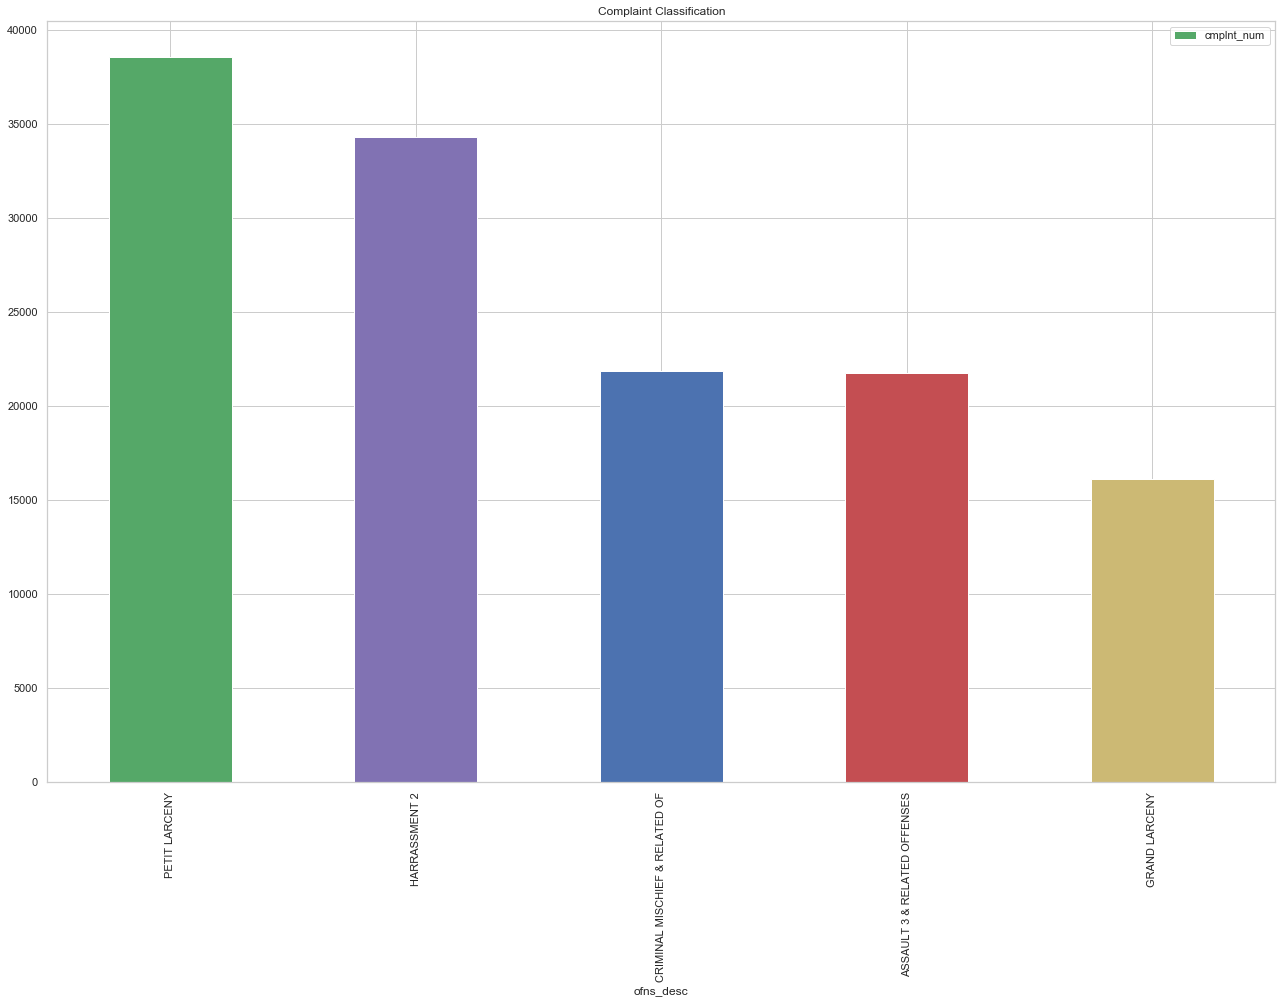

In [61]:
sns.set_theme(style="whitegrid")
g_colors = 'gmbryck'
gb_ofns_desc = df.groupby('ofns_desc').agg({'cmplnt_num':'count'}).sort_values(by= 'cmplnt_num',ascending=False)#.plot.bar(color = gr_colors,figsize=(18,20))
gb_ofns_desc.head().plot(kind = "bar",title = 'Complaint Classification', figsize=(22,14),color = g_colors)
#df.plot(xlabel='X Label', ylabel='Y Label', title='Plot Title')

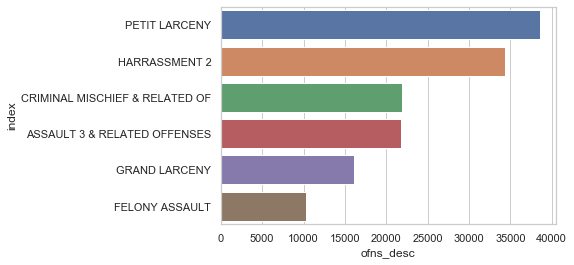

In [80]:
ax = sns.barplot(x="ofns_desc", y="index", data=compl_type)

In [41]:
df.columns

Index(['cmplnt_num', 'addr_pct_cd', 'boro_nm', 'cmplnt_fr_dt', 'cmplnt_fr_tm',
       'cmplnt_to_dt', 'cmplnt_to_tm', 'crm_atpt_cptd_cd', 'hadevelopt',
       'housing_psa', 'jurisdiction_code', 'juris_desc', 'ky_cd', 'law_cat_cd',
       'loc_of_occur_desc', 'ofns_desc', 'parks_nm', 'patrol_boro', 'pd_cd',
       'pd_desc', 'prem_typ_desc', 'rpt_dt', 'station_name', 'susp_age_group',
       'susp_race', 'susp_sex', 'transit_district', 'vic_age_group',
       'vic_race', 'vic_sex', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'lat_lon', 'new_georeferenced_column'],
      dtype='object')

In [76]:
df_sex = df.susp_sex.value_counts().reset_index()
df_sex

,index,susp_sex
0,M,95883
1,U,41832
2,F,25845


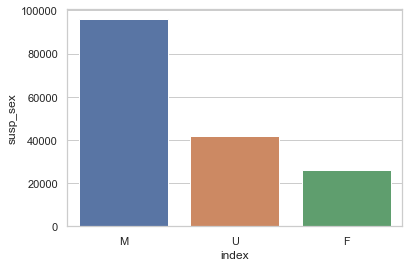

In [78]:
ax = sns.barplot(x="index", y="susp_sex", data=df_sex)

Text(0, 0.5, 'Number of Complaints')

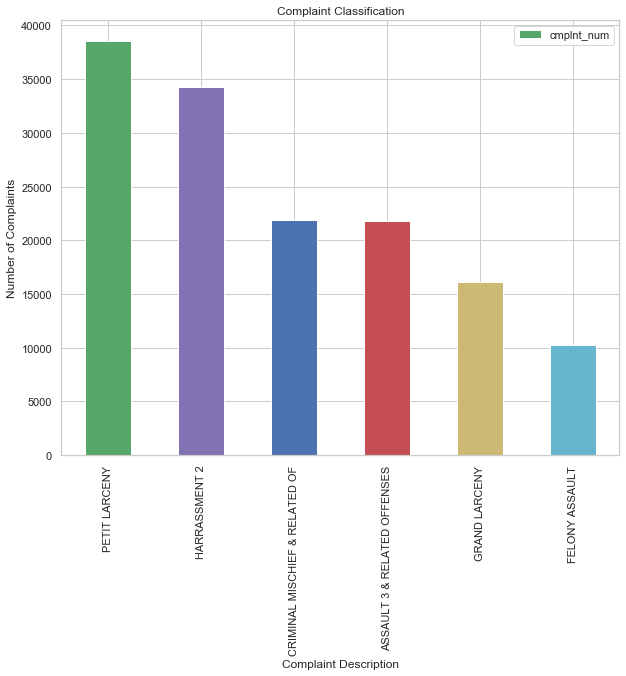

In [54]:
gb_compl_top6 = gb_compl_type.head(6)
gb_compl_top6.plot(kind = 'bar', figsize = (10,8),color = g_colors)
plt.title("Complaint Classification")
plt.xlabel("Complaint Description")
plt.ylabel("Number of Complaints")

### PETIT LARCENY 
Under our law, a person is guilty of petit larceny when such
person steals property.
A person STEALS PROPERTY and commits larceny when,
with the intent to deprive another of property or to appropriate the
same to himself or herself or to a third person, such person
wrongfully takes, obtains, or withholds such property from an
owner of the property. 2 2
PROPERTY means any money, personal property, or thing of value
OWNER means a person having a right to possession to
the property superior to that of the person who takes it.
INTENT means a conscious objective or purpose.

Link to [info](https://www.nycourts.gov/judges/cji/2-PenalLaw/155/155.25.Petit%20Larceny.Revision.pdf)

#### Question to Ask Our Data

- Race of suspect in the interactions of NYPD?


In [21]:
susp_race_df = df['susp_race'].value_counts().reset_index()
susp_race_df

,index,susp_race
0,BLACK,59064
1,UNKNOWN,49126
2,WHITE HISPANIC,25797
3,WHITE,15291
4,BLACK HISPANIC,8080
5,ASIAN / PACIFIC ISLANDER,5900
6,AMERICAN INDIAN/ALASKAN NATIVE,302


In [55]:
gb_race = df.groupby('susp_race').agg({'cmplnt_num':'count'})
gb_race.sort_values(by= 'cmplnt_num',ascending=False,inplace = True)
gb_race

,cmplnt_num
susp_race,
BLACK,59064
UNKNOWN,49126
WHITE HISPANIC,25797
WHITE,15291
BLACK HISPANIC,8080
ASIAN / PACIFIC ISLANDER,5900
AMERICAN INDIAN/ALASKAN NATIVE,302


Text(0, 0.5, 'Number of Complaints')

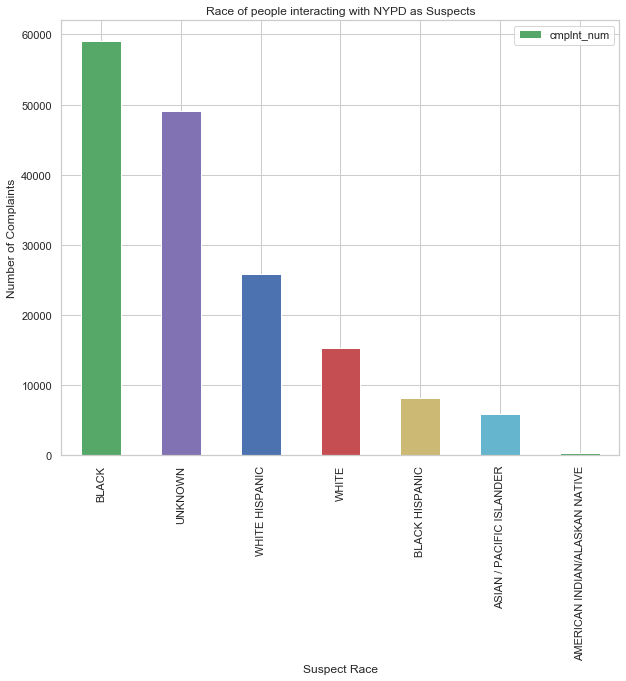

In [56]:
gr_colors = 'gmbryc'
gb_race.plot.bar(color = gr_colors,figsize = (10,8))
plt.title("Race of people interacting with NYPD as Suspects")
plt.xlabel("Suspect Race")
plt.ylabel("Number of Complaints")


 ##  Race and type of complaints 

In [72]:
gb_race_compl = df.groupby(['ofns_desc','susp_race']).agg({'cmplnt_num':'count'})
gb_race_compl.sort_values(by =  'cmplnt_num',ascending = False, inplace = True)
gb_race_compl.head()


,,cmplnt_num
ofns_desc,susp_race,
HARRASSMENT 2,BLACK,13375
PETIT LARCENY,UNKNOWN,12003
ASSAULT 3 & RELATED OFFENSES,BLACK,9203
PETIT LARCENY,BLACK,8389
GRAND LARCENY,UNKNOWN,6885


### HARASSMENT IN THE SECOND DEGREE
Under our law, a person is guilty of Harassment in the
Second Degree when, with intent to harass, annoy or alarm
another person, he or she strikes, shoves, kicks or otherwise subjects such other
person to physical contact, or attempts or threatens to do
the same.
follows a person in or about a public place or places.

link to [info](https://nycourts.gov/judges/cji/2-PenalLaw/240/240-26.pdf)


In [58]:
# Top 5 complaint offenses (race to offense map)
gb_r_c_top5 = gb_race_compl.head()
gb_r_c_top5

,,cmplnt_num
ofns_desc,susp_race,
HARRASSMENT 2,BLACK,13375
PETIT LARCENY,UNKNOWN,12003
ASSAULT 3 & RELATED OFFENSES,BLACK,9203
PETIT LARCENY,BLACK,8389
GRAND LARCENY,UNKNOWN,6885


Text(0, 0.5, 'Number of Complaints')

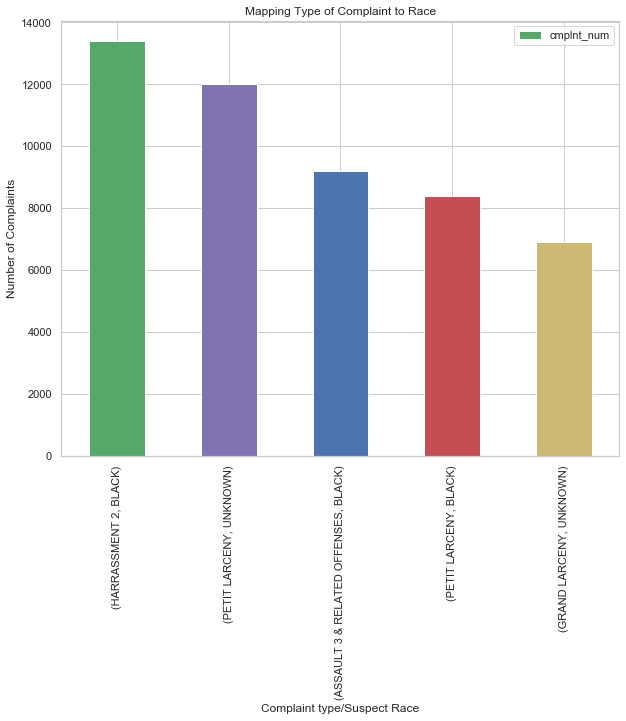

In [59]:
gb_r_c_top5.plot.bar(color = g_colors, figsize = (10,8))
plt.title("Mapping Type of Complaint to Race")
plt.xlabel("Complaint type/Suspect Race")
plt.ylabel("Number of Complaints")


#### Questions to Ask Our Data

- Is there a difference between boroughs and what complaints go on? 

In [27]:
df.boro_nm.value_counts().reset_index()


,index,boro_nm
0,BROOKLYN,58372
1,MANHATTAN,49570
2,QUEENS,44354
3,BRONX,42962
4,STATEN ISLAND,9002


In [28]:
gb_boro = df.groupby(['boro_nm','ofns_desc']).agg({'cmplnt_num':'count'})#.sort_values(by= 'cmplnt_num',ascending=False).plot.bar(color = g_colors)
gb_boro.sort_values(by = 'cmplnt_num', ascending = False,inplace = True)
#gb_boro.plot.bar(color = g_colors)
gb_boro.head(6)
#plt.figsize = (20,20)

cmplnt_num
boro_nm   ofns_desc                
MANHATTAN PETIT LARCENY       11989
BROOKLYN  PETIT LARCENY       10442
          HARRASSMENT 2       10137
QUEENS    PETIT LARCENY        8775
          HARRASSMENT 2        7723
BRONX     HARRASSMENT 2        7579

In [29]:
#df.plot(xlabel='X Label', ylabel='Y Label', title='Plot Title')
#df.plot(xlabel="new x", ylabel="new y");


Text(0, 0.5, 'Number of Complaints')

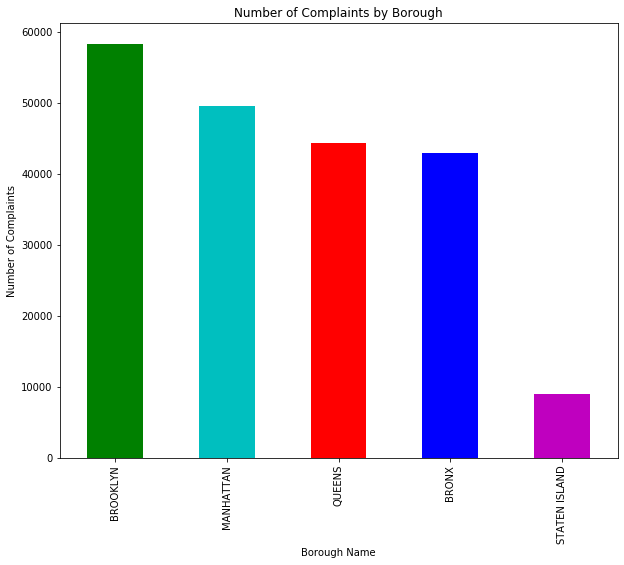

In [30]:
gr_colors = ['g','c','r','b','m']
#gr_colors2 = 'gcrbm'
g=df.boro_nm.value_counts()
g.plot.bar(figsize = (10,8),color=gr_colors)
plt.title("Number of Complaints by Borough")
plt.xlabel("Borough Name")
plt.ylabel("Number of Complaints")


#### Question to Ask Our Data

- Comparing both genders to see if there any difference of what complaints they deal with. 


In [31]:
df_sex = (df.groupby(['susp_sex'])
.agg({'cmplnt_num':'count'}).sort_values(by= 'cmplnt_num',ascending=False))
df_sex

,cmplnt_num
susp_sex,
M,95883
U,41832
F,25845


In [32]:
df.columns

Index(['cmplnt_num', 'addr_pct_cd', 'boro_nm', 'cmplnt_fr_dt', 'cmplnt_fr_tm',
       'cmplnt_to_dt', 'cmplnt_to_tm', 'crm_atpt_cptd_cd', 'hadevelopt',
       'housing_psa', 'jurisdiction_code', 'juris_desc', 'ky_cd', 'law_cat_cd',
       'loc_of_occur_desc', 'ofns_desc', 'parks_nm', 'patrol_boro', 'pd_cd',
       'pd_desc', 'prem_typ_desc', 'rpt_dt', 'station_name', 'susp_age_group',
       'susp_race', 'susp_sex', 'transit_district', 'vic_age_group',
       'vic_race', 'vic_sex', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'lat_lon', 'new_georeferenced_column'],
      dtype='object')

In [33]:
m= df[df['susp_sex']=='M'].reset_index()
f = df[df['susp_sex']=='F'].reset_index()

Text(0.5, 1.0, 'Scatter Plot of Complaint Suspect by Gender')

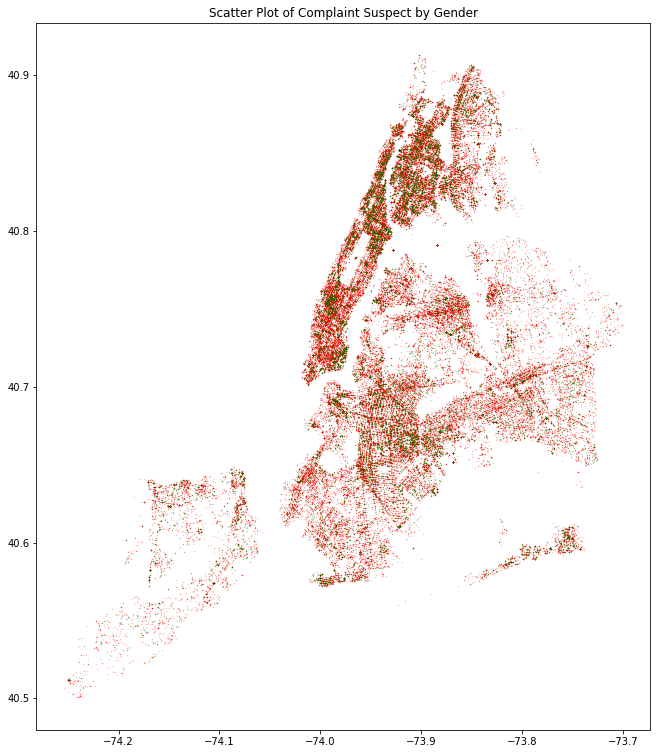

In [34]:
plt.figure(figsize=(11,13))
plt.scatter(x=m['longitude'],y=m['latitude'],alpha=.5,s=.05,c='r')
plt.scatter(x=f['longitude'],y=f['latitude'],alpha=.5,s=.05,c='g')
plt.title('Scatter Plot of Complaint Suspect by Gender')
# x = The column name or column position to be used as horizontal coordinates for each point.
# y = The column name or column position to be used as vertical coordinates for each point.

### Looking for Info on Age Groups

In [35]:
df.susp_age_group.value_counts()

UNKNOWN    73280
25-44      53173
45-64      17882
18-24      14712
<18         2647
65+         1849
2021          10
1017           1
-969           1
-973           1
-941           1
-947           1
-975           1
-966           1
Name: susp_age_group, dtype: int64

In [36]:
race_gb = df.groupby('susp_race')['susp_age_group'].value_counts()
race_gb.to_frame()

susp_age_group
susp_race                      susp_age_group                
AMERICAN INDIAN/ALASKAN NATIVE 25-44                      136
                               45-64                       58
                               UNKNOWN                     58
                               18-24                       40
                               <18                          7
                               65+                          3
ASIAN / PACIFIC ISLANDER       25-44                     2746
                               45-64                     1158
                               UNKNOWN                   1102
                               18-24                      648
                               65+                        163
                               <18                         83
BLACK                          25-44                    25468
                               UNKNOWN                  15541
                               45-64                     8367
                               18-24                     7693
                               <18                       1357
                               65+                        632
                               2021                         3
                               -966                         1
                               -969                         1
                               1017                         1
BLACK HISPANIC                 25-44                     3829
                               UNKNOWN                   1669
                               18-24                     1227
                               45-64                     1014
                               <18                        257
                               65+                         82
                               -947                         1
                               2021                         1
UNKNOWN                        UNKNOWN                  45431
                               25-44                     2092
                               45-64                      679
                               18-24                      619
                               <18                        185
                               65+                        116
                               2021                         4
WHITE                          25-44                     6492
                               UNKNOWN                   3994
                               45-64                     3074
                               18-24                     1011
                               65+                        533
                               <18                        184
                               2021                         2
                               -975                         1
WHITE HISPANIC                 25-44                    12410
                               UNKNOWN                   5485
                               45-64                     3532
                               18-24                     3474
                               <18                        574
                               65+                        320
                               -941                         1
                               -973                         1

In [37]:
gb_age_gr = df.groupby(['susp_age_group']).agg({'cmplnt_num':'count'})#.sort_values(by= 'ARREST_KEY',ascending=False))
gb_age_gr.sort_values(by= 'cmplnt_num',ascending = False,inplace = True)

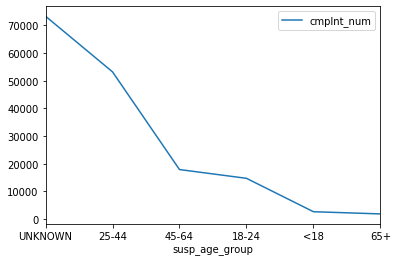

In [38]:
gb_age_gr = gb_age_gr.head(6)
gb_age_gr.plot()

In [39]:
dfl = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])

In [40]:
dfl

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [41]:
dfl.drop([0])

,A,B,C,D
1,4,5,6,7
2,8,9,10,11


In [42]:
# Try to isolate the borugh
df.columns

Index(['cmplnt_num', 'addr_pct_cd', 'boro_nm', 'cmplnt_fr_dt', 'cmplnt_fr_tm',
       'cmplnt_to_dt', 'cmplnt_to_tm', 'crm_atpt_cptd_cd', 'hadevelopt',
       'housing_psa', 'jurisdiction_code', 'juris_desc', 'ky_cd', 'law_cat_cd',
       'loc_of_occur_desc', 'ofns_desc', 'parks_nm', 'patrol_boro', 'pd_cd',
       'pd_desc', 'prem_typ_desc', 'rpt_dt', 'station_name', 'susp_age_group',
       'susp_race', 'susp_sex', 'transit_district', 'vic_age_group',
       'vic_race', 'vic_sex', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'lat_lon', 'new_georeferenced_column'],
      dtype='object')

In [43]:
df['boro_nm'].value_counts()

BROOKLYN         58372
MANHATTAN        49570
QUEENS           44354
BRONX            42962
STATEN ISLAND     9002
Name: boro_nm, dtype: int64

In [44]:
df.isnull().sum()['boro_nm']

385

In [45]:
man_df= df[df['boro_nm']=='MANHATTAN']
man_df.head()

,cmplnt_num,addr_pct_cd,boro_nm,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,crm_atpt_cptd_cd,hadevelopt,housing_psa,...,transit_district,vic_age_group,vic_race,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon,new_georeferenced_column
13,957810616,18,MANHATTAN,02/25/2021,18:15:00,02/25/2021,18:30:00,COMPLETED,Not aplicable,No level development code,...,No data available,25-44,WHITE HISPANIC,F,987287,220178,40.771022,-73.989037,"(40.77102181400005, -73.98903697199995)",POINT (-73.98903697199995 40.77102181400005)
14,738990323,25,MANHATTAN,03/09/2021,19:45:00,03/09/2021,19:50:00,COMPLETED,Not aplicable,No level development code,...,No data available,UNKNOWN,UNKNOWN,E,1002641,231749,40.802763,-73.933573,"(40.80276250500003, -73.93357277899997)",POINT (-73.93357277899997 40.80276250500003)
15,126186881,14,MANHATTAN,03/03/2021,16:17:00,NaN,NaN,COMPLETED,Not aplicable,No level development code,...,No data available,UNKNOWN,UNKNOWN,D,987220,212676,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)",POINT (-73.98928217599996 40.75043076800005)
22,270972500,19,MANHATTAN,02/22/2021,11:24:00,02/22/2021,11:36:00,COMPLETED,Not aplicable,No level development code,...,No data available,UNKNOWN,UNKNOWN,D,998835,224880,40.783916,-73.947335,"(40.783916057000056, -73.94733504199996)",POINT (-73.94733504199996 40.783916057000056)
26,133888342,6,MANHATTAN,02/13/2021,02:45:00,02/13/2021,02:55:00,COMPLETED,Not aplicable,No level development code,...,No data available,45-64,BLACK,M,985126,207917,40.737369,-73.996840,"(40.73736895500008, -73.99684042399997)",POINT (-73.99684042399997 40.73736895500008)


In [46]:
# data frames by gender
man_m= man_df[man_df['susp_sex']=='M'].reset_index()
man_f= man_df[man_df['susp_sex']=='F'].reset_index()

# data frames by the top complaint
#PETIT LARCENY
plar= man_df[man_df['ofns_desc']=='PETIT LARCENY'].reset_index()


Text(0.5, 1.0, 'Scatter Plot of Complaint Suspect by Gender in Manhattan')

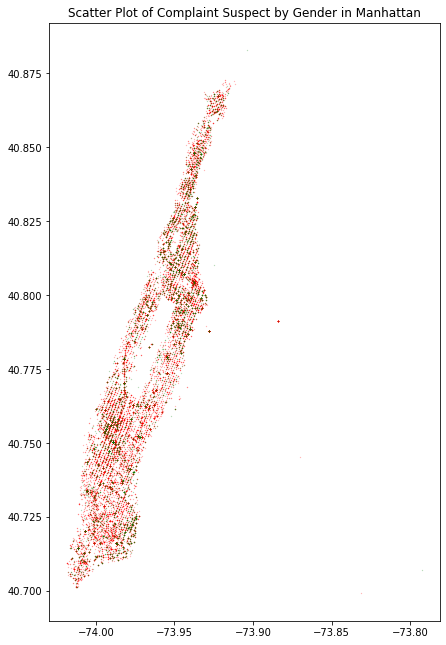

In [47]:
plt.figure(figsize=(7,11))
plt.scatter(x=man_m['longitude'],y=man_m['latitude'],alpha=.5,s=.05,c='r')
plt.scatter(x=man_f['longitude'],y=man_f['latitude'],alpha=.5,s=.05,c='g')
plt.title('Scatter Plot of Complaint Suspect by Gender in Manhattan')

Text(0.5, 1.0, "Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

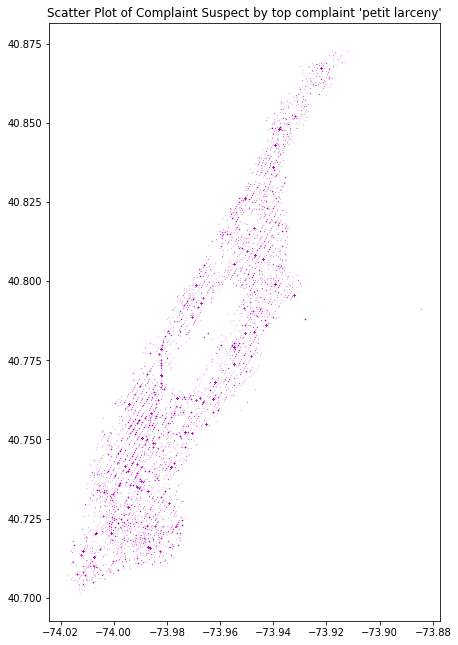

In [48]:
plt.figure(figsize=(7,11))
plt.scatter(x=plar['longitude'],y=plar['latitude'],alpha=.5,s=.05,c='m')
plt.title("Scatter Plot of Complaint Suspect by top complaint 'petit larceny'" )

In [49]:
brooklyn_cond = df['boro_nm']=='BROOKLYN'

# brooklyn dataframe
bk_df = df[brooklyn_cond]

# petit larcerny dataframe from brooklyn df
bk_plar= bk_df[bk_df['ofns_desc']=='PETIT LARCENY'].reset_index()

Text(0.5, 1.0, "Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

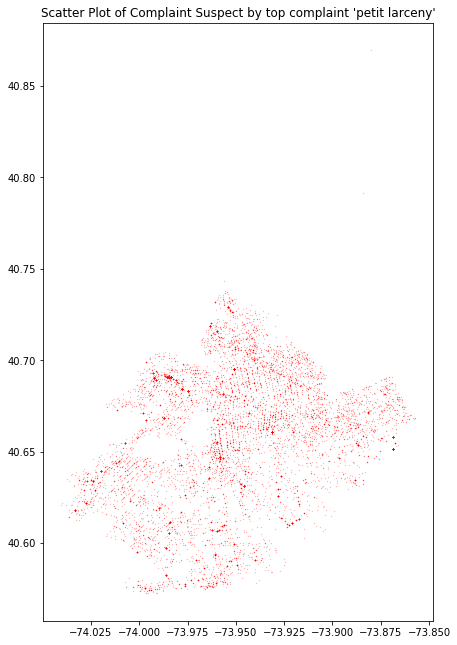

In [50]:
plt.figure(figsize=(7,11))
plt.scatter(x=bk_plar['longitude'],y=bk_plar['latitude'],alpha=.5,s=.05,c='r')
plt.title("Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

In [36]:
queens_cond = df['boro_nm']=='QUEENS'

# queens dataframe
q_df = df[queens_cond]

In [63]:
# petit larceny dataframe from queens df
q_plar= q_df[q_df['ofns_desc']=='PETIT LARCENY']
type(q_plar)

pandas.core.frame.DataFrame

Text(0.5, 1.0, "Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

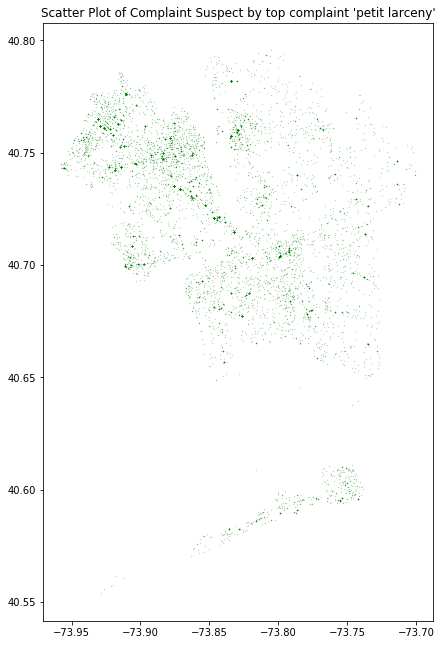

In [53]:
plt.figure(figsize=(7,11))
plt.scatter(x=q_plar['longitude'],y=q_plar['latitude'],alpha=.5,s=.05,c='g')
plt.title("Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

In [54]:

list_of_brs = ['QUEENS','BROOKLYN']
selected_brs = df.boro_nm.isin(list_of_brs)

# dataframe queens and brooklyn
q_bk_df = df[selected_brs]

In [55]:
q_bk_plar= q_bk_df[q_bk_df['ofns_desc']=='PETIT LARCENY'].reset_index()

Text(0.5, 1.0, "Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

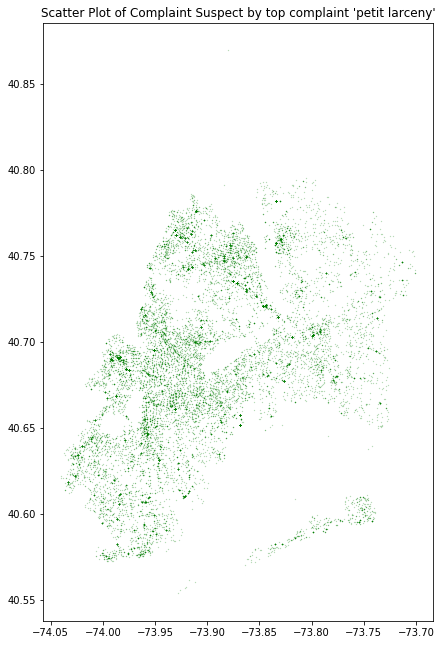

In [56]:
plt.figure(figsize=(7,11))
plt.scatter(x=q_bk_plar['longitude'],y=q_bk_plar['latitude'],alpha=.5,s=.05,c='g')
plt.title("Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

Text(0.5, 1.0, "Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

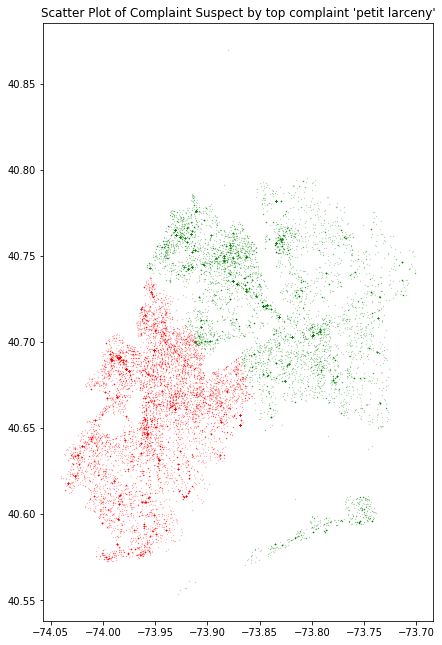

In [57]:
plt.figure(figsize=(7,11))
plt.scatter(x=bk_plar['longitude'],y=bk_plar['latitude'],alpha=.5,s=.05,c='r')
plt.scatter(x=q_plar['longitude'],y=q_plar['latitude'],alpha=.5,s=.05,c='g')
plt.title("Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

Text(0.5, 1.0, "Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

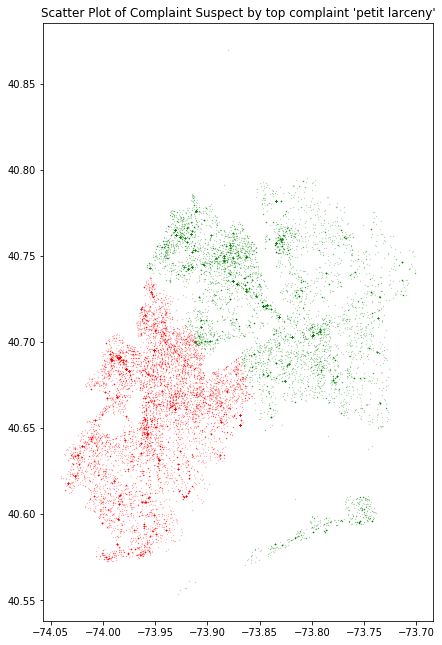

In [58]:
plt.figure(figsize=(7,11))
plt.scatter(x=bk_plar['longitude'],y=bk_plar['latitude'],alpha=.5,s=.05,c='r')
plt.scatter(x=q_plar['longitude'],y=q_plar['latitude'],alpha=.5,s=.05,c='g')
plt.title("Scatter Plot of Complaint Suspect by top complaint 'petit larceny'")

In [59]:
#Might make use of this 
#c1 = df['neighbourhood'] == 'Williamsburg'
#df['is_in_williamsburg'] = np.where( c1, 1, 0)


In [1]:
print ("david is here")

david is here


In [37]:
geolocator = geopy.Nominatim(user_agent="check_1")


In [38]:
def get_zip_code(x):
    location = geolocator.reverse("{}, {}".format(x["latitude"],x["longitude"]))
    return location.raw["address"]["postcode"]

In [39]:
q_df.shape

(44354, 36)

In [ ]:
#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)

In [40]:
q_df["zipcode"] = q_df[0:100].apply(lambda x: get_zip_code(x), axis=1)

/Users/jorgegranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
q_df.head()